In [3]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns


4.	Using the pandas `read_csv()` method, read the GDP dataset into your notebook as a DataFrame called `gdp_df`. Take a look at the first few and last few rows to familiarize yourself with what is contained in this dataset.

In [4]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv')

In [5]:
print(gdp_df.head())

  Country or Area  Year        Value  Value Footnotes
0     Afghanistan  2020  1970.560169              NaN
1     Afghanistan  2019  2065.036235              NaN
2     Afghanistan  2018  2033.804389              NaN
3     Afghanistan  2017  2058.400221              NaN
4     Afghanistan  2016  2057.067978              NaN


5. How many rows and columns are in `gdp_df`? What are the data types of each column?

In [6]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7176 entries, 0 to 7175
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  7176 non-null   object 
 1   Year             7176 non-null   int64  
 2   Value            7176 non-null   float64
 3   Value Footnotes  0 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 224.4+ KB


6. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

In [7]:
gdp_df.rename(columns={'Country or Area': 'Country'}, inplace=True)
gdp_df.rename(columns={'Value': 'GDP_Per_Capita'}, inplace=True)
gdp_df = gdp_df[['Country', 'Year', 'GDP_Per_Capita']]
print(gdp_df.head())

       Country  Year  GDP_Per_Capita
0  Afghanistan  2020     1970.560169
1  Afghanistan  2019     2065.036235
2  Afghanistan  2018     2033.804389
3  Afghanistan  2017     2058.400221
4  Afghanistan  2016     2057.067978


7. How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice? 

In [8]:
year_info = gdp_df[["Year","Country"]]
year_info = year_info.groupby("Country").count()
all_years = year_info[year_info["Year"]==31].count()
print(all_years)

Year    205
dtype: int64


8. In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?
 - Notice most countries have low GDP_per_capita, below 20000. The histogram, and density are good visulas for comparing amount of countries with x amount of GDP to others with x amount. The box and violin make comparing different levels of GDP diffucult.

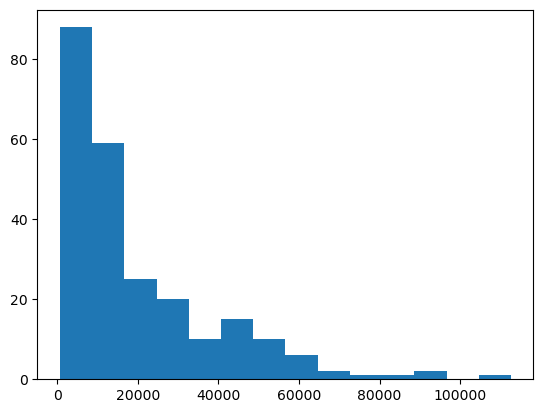

In [19]:
#Histplot using matplot
gdp_plotting = gdp_df[gdp_df["Year"] == 2020]


plt.hist(gdp_plotting['GDP_Per_Capita'], bins=14)

plt.show()


array([[<Axes: title={'center': 'GDP_Per_Capita'}>]], dtype=object)

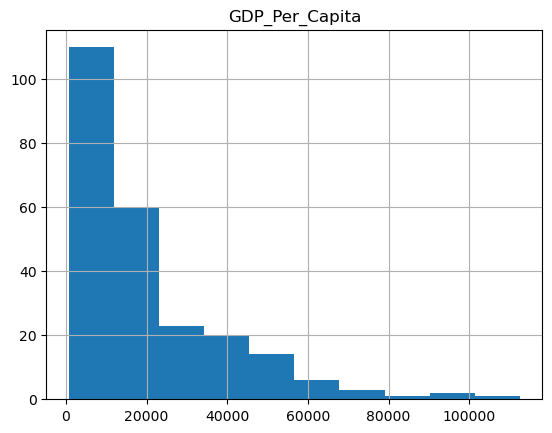

In [32]:
#histplot using pandas
gdp_plotting.hist('GDP_Per_Capita')

<Axes: xlabel='GDP_Per_Capita', ylabel='Density'>

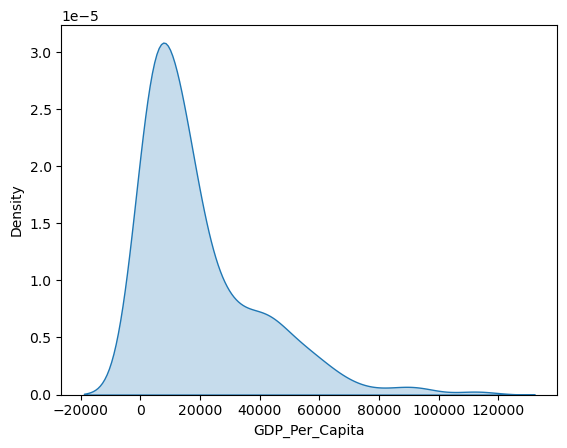

In [24]:
#densityplot using seaborn
sns.kdeplot(gdp_plotting['GDP_Per_Capita'], fill = 'blue')

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

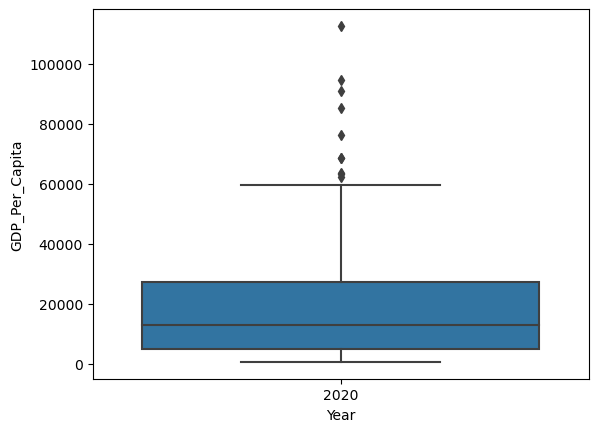

In [28]:
#Boxplot using seaborn
sns.boxplot( x=gdp_plotting["Year"], y=gdp_plotting["GDP_Per_Capita"] )

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

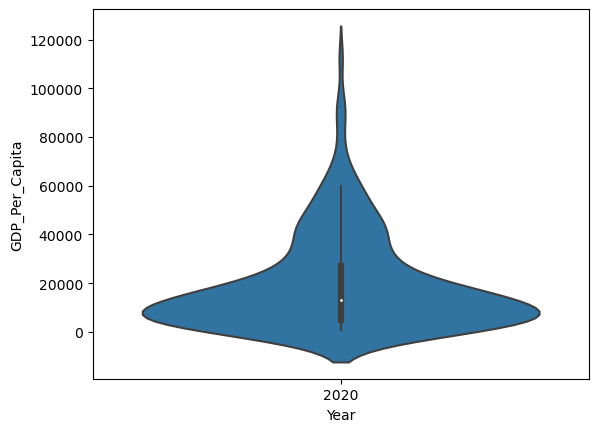

In [30]:
#Violin plot using
sns.violinplot(x=gdp_plotting["Year"], y=gdp_plotting["GDP_Per_Capita"])

9. What was the median GDP per capita value in 2020?

In [33]:
gdp_plotting.median()

C:\Users\Aaron\AppData\Local\Temp\ipykernel_17876\179863449.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  gdp_plotting.median()


Year               2020.000000
GDP_Per_Capita    12908.937406
dtype: float64